In [57]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotnine as p9

np.random.seed(42)

sns.set_style("whitegrid")
Path.cwd()
data_dir = (Path.cwd().parent / ".data/extra-L02").resolve()
assert data_dir.exists()

In [58]:
list(f"{pth.stem}{pth.suffix}" for pth in data_dir.glob("*"))

['tourism.xlsx', 'tute1.csv', 'tourism_no_fmt.xlsx']

In [59]:
df = (
    pd.read_excel(data_dir / "tourism.xlsx", sheet_name="Sheet1")
    .astype(dict(map(lambda c: (c, "category"), ["Region", "State", "Purpose"])))
    .assign(Quarter=lambda df: pd.to_datetime(df["Quarter"]))
    .set_index(
        ["Quarter", "Region", "State", "Purpose"]
    )
)
df

,,,,Trips
Quarter,Region,State,Purpose,
1998-01-01,Adelaide,South Australia,Business,135.077690
1998-04-01,Adelaide,South Australia,Business,109.987316
1998-07-01,Adelaide,South Australia,Business,166.034687
1998-10-01,Adelaide,South Australia,Business,127.160464
1999-01-01,Adelaide,South Australia,Business,137.448533
...,...,...,...,...
2016-10-01,Yorke Peninsula,South Australia,Visiting,33.672151
2017-01-01,Yorke Peninsula,South Australia,Visiting,46.223014
2017-04-01,Yorke Peninsula,South Australia,Visiting,50.582837


In [60]:
# Find what combination of Region and Purpose had the maximum number of overnight trips on average.
df.groupby(["Region", "Purpose"]).mean().idxmax()

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_61669/2436044702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Trips    (Sydney, Visiting)
dtype: object

In [61]:
# Create a new tsibble which combines the Purposes and Regions, and just has total trips by State.
df_qs = (
    df.groupby(["Quarter", "State"])
    .sum()
    .reset_index()
    .set_index(["Quarter", "State"])
)
df_qs

/var/folders/yl/_h6j91qd4d30w8vyy7hnlvjh0000gn/T/ipykernel_61669/3395985274.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Trips
Quarter    State                          
1998-01-01 ACT                  551.001921
           New South Wales     8039.794795
           Northern Territory   181.448823
           Queensland          4041.370159
           South Australia     1735.438418
...                                    ...
2017-10-01 Queensland          5813.903667
           South Australia     1869.106985
           Tasmania             800.508499
           Victoria            6865.398851
           Western Australia   2635.754296

[640 rows x 1 columns]

In [62]:
sampled_combination = (
    df
    .reset_index()
    [['Region', 'State', 'Purpose']]
    .drop_duplicates()
    .sample(n=1)
    .iloc[0]
)
sampled_combination

Region             MacDonnell
State      Northern Territory
Purpose              Business
Name: 14400, dtype: object

In [63]:
df_r = (
    df
    .reset_index()
    .query(
        f"Region == '{sampled_combination['Region']}'"
        f"& Purpose == '{sampled_combination['Purpose']}'"
        f"& State == '{sampled_combination['State']}'"
    )
)

print(df_r[["Region", "Purpose", "State"]].value_counts())

df_r = df_r.drop(columns=["Region", "Purpose", "State"]).set_index("Quarter")
df_r

Region      Purpose   State             
MacDonnell  Business  Northern Territory    80
Name: count, dtype: int64


,Trips
Quarter,
1998-01-01,8.616410
1998-04-01,3.337375
1998-07-01,3.825849
1998-10-01,4.543881
1999-01-01,2.972091
...,...
2016-10-01,4.548222
2017-01-01,8.813324
2017-04-01,16.762800


<Axes: xlabel='Quarter', ylabel='Trips'>

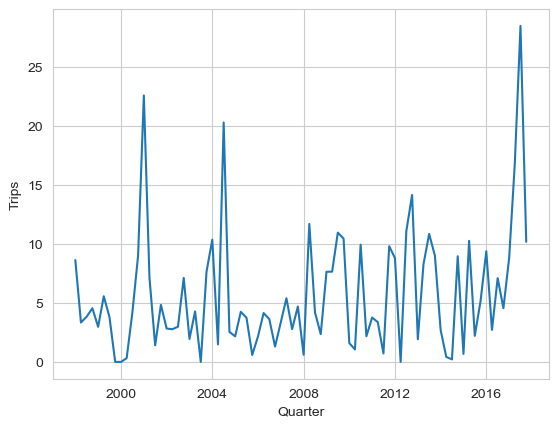

In [64]:
sns.lineplot(data=df_r, x="Quarter", y="Trips")